<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducing-Container-Technologies" data-toc-modified-id="Introducing-Container-Technologies-1">Introducing Container Technologies</a></span><ul class="toc-item"><li><span><a href="#Understanding-What-Containers-Are" data-toc-modified-id="Understanding-What-Containers-Are-1.1">Understanding What Containers Are</a></span></li><li><span><a href="#Mechanisms-that-Make-Container-Isolation-Possible" data-toc-modified-id="Mechanisms-that-Make-Container-Isolation-Possible-1.2">Mechanisms that Make Container Isolation Possible</a></span></li><li><span><a href="#Introducing-the-Docker-Container-Platform" data-toc-modified-id="Introducing-the-Docker-Container-Platform-1.3">Introducing the Docker Container Platform</a></span><ul class="toc-item"><li><span><a href="#Understanding-Docker-Concepts" data-toc-modified-id="Understanding-Docker-Concepts-1.3.1">Understanding Docker Concepts</a></span></li><li><span><a href="#VMs-vs-Docker-Containers" data-toc-modified-id="VMs-vs-Docker-Containers-1.3.2">VMs vs Docker Containers</a></span></li></ul></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-2">References</a></span></li></ul></div>

# Introducing Container Technologies

Kubernetes uses Linux container technologies to provide isolation of running applications.

## Understanding What Containers Are

<!-- PELICAN_BEGIN_SUMMARY -->

A process running in a container runs inside the host's operating system, like all other processes. But the process in the container is still isolated from other processes. To the process itself, it looks like it is only one running on the machine and in its operating system. 

![](https://i.imgur.com/uYGIEtg.png)

<!-- PELICAN_END_SUMMARY -->

When you run three VMs on a host, you have three completely separate operating systems running on and sharing the same bare-metal hardware. Underneath those VMs is the host’s OS and a hypervisor, which divides the physical hardware resources into smaller sets of virtual resources that can be used by the operating system inside each VM. Applications running inside those VMs perform system calls to the guest OS’ kernel in the VM, and the kernel then performs x86 instructions on the host’s physical CPU through the hypervisor. 

Containers, on the other hand, all perform system calls on the exact same kernel running in the host OS. This single kernel is the only one performing x86 instructions on the host’s CPU. The CPU doesn’t need to do any kind of virtualization the way it does with VMs

<img src="https://i.imgur.com/4GTjqpO.png" align="left" width="80%">


## Mechanisms that Make Container Isolation Possible

Two mechanisms make this possible:
- **Linux Namespaces**--makes sure each process sees its own personal view of the system (files, processes, network interfaces, hostname, etc..)
- **Linux Control Groups (cgroups)**--which limit the amounts of resources the process can consume (CPU, memory, network bandwidth, and so on).

>![](https://i.imgur.com/IcFoRq3.png)(source: [Stackoverflow](https://stackoverflow.com/questions/34820558/difference-between-cgroups-and-namespaces))

By default, each Linux system initially has one single namespace. All system resources, such as filesystems, process IDs, user IDs, network interfaces, and others, belong to the single namespace.

The following kinds of namespaces exist:
- Mount(mnt)
- Process ID (pid)
- Network (net)
- Inter-process communication (ipc)
- UTS
- User ID (user)

Each namespace kind is used to isolate a certain group of resources. For example, the UTS namespace determines what hostname and domain name the process running inside that namespace sees. By assigning two different UTS namespaces to a pair of processes, you can make them see different local hostnames. In other words, to the two processes, it will appear as though they are running on two different machines (at least as far as the hostname is concerned).

Likewise, what Network namespace a process belongs to determines which network interfaces the application running inside the process sees. Each network interface belongs to exactly one namespace, but can be moved from one namespace to another. Each container uses its own Network namespace, and therefore each container sees its own set of network interfaces. 

## Introducing the Docker Container Platform

When you run an application packaged with [Docker](https://www.docker.com/), it sees the exact filesystem contents that you’ve bundled with it. It sees the same files whether it’s running on your development machine or a production machine, even if it the production server is running a completely different Linux OS. The application won’t see anything from the server it’s running on, so it doesn’t matter if the server has a completely different set of installed libraries compared to your development machine. 

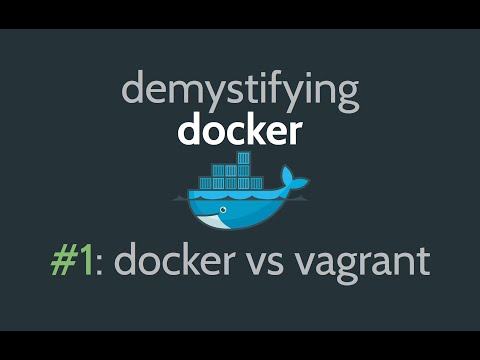

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("pGYAg7TMmp0")

A big difference between Docker-based container images and VM images is that container images are composed of layers, which can be shared and reused across multiple images. This means only certain layers of an image need to be downloaded if the other layers were already downloaded previously when running a different container image that also contains the same layers. 

### Understanding Docker Concepts

The three main concepts in Docker comprise this scenario:
    
- **Images**--A Docker-based container image is something you package your application and its environment into. It contains the filesystem that will be available to the application and othe metadata, such as the path to the executable that should be executed when the image is run.

- **Registries**--A Docker Registry is a repository that stores your Docker images and facilitates easy sharing of those images between different people and computers. When you build your image, you can either run it on the computer you have built it on, or you can push (upload) the image to a registry and then pull (download) it on another computer and run it there. Certain registries are public, allowing anyone to pull images from it, while others are private, only accessible to certain people or machines.

- **Containers**--A Docker-based container is a regular Linux container created from a Docker-based container image. A running container is a process running on the host running Docker, but it is completely isolated from both the host and all other processes running on it. The process is also resource-constrained, meaning it can only access and use the amount of resources (CPU, RAM, and so on) that are allocated to it. 

The developer first builds an image and then pushes it to a registry. The image is thus available to anyone who can access the registry. They can then pull the image to any other machine running Docker and run the image. Docker creates an isolated container based on the image and runs the binary executable specified as part of the image. 

![](https://i.imgur.com/h5WILlx.png)

### VMs vs Docker Containers

<img src="https://i.imgur.com/ZdEiFCV.png" width="80%">

# References

- [ Kubernetes in Action, Marko Lukša ](https://www.manning.com/books/kubernetes-in-action)